In [1]:
import os

from matplotlib import pyplot as plt
import mne
import mne_bids

In [2]:
def get_all_files(path, suffix, get_bids=False, prefix=None, bids_root=None):
    """Return all files in all (sub-)directories of path with given suffixes and prefixes (case-insensitive).

    Args:
        path (string)
        suffix (iterable): e.g. ["vhdr", "edf"] or [".json"]
        get_bids (boolean): True if BIDS_Path type should be returned instead of string. Default: False
        bids_root (string/path): Path of BIDS root folder. Only required if get_bids=True.
        prefix (iterable): e.g. ["SelfpacedRota", "ButtonPress] (optional)

    Returns:
        filepaths (list of strings or list of BIDS_Path)
    """
    filepaths = []
    for root, dirs, files in os.walk(path):
        for file in files:
            for suff in suffix:
                if file.endswith(suff.lower()):
                    if prefix is not None:
                        for pref in list(prefix):
                            if pref.lower() in file.lower():
                                filepaths.append(os.path.join(root, file))
                    else:
                        filepaths.append(os.path.join(root, file))
    if not filepaths:
        print("No files found.")
    if get_bids:
        bids_paths = []
        for filepath in filepaths:
            subject, session, task, run = get_subject_sess_task_run(filepath)
            bids_path = mne_bids.BIDSPath(subject=subject, session=session, task=task, run=run, datatype="ieeg",
                                          root=bids_root)
            bids_paths.append(bids_path)
        return bids_paths
    else:
        return filepaths
    
    
def get_subject_sess_task_run(vhdr_file):
    """ Given a BIDS-conform filename return the corresponding subject, session, task and run.

    Args:
        vhdr_file (string): Name of file
    Return:
        subject, sess, task, run (strings)
    """

    subject = vhdr_file[vhdr_file.rfind('sub-') + 4:vhdr_file.rfind('ses') - 1]

    str_sess = vhdr_file[vhdr_file.rfind('ses'):]
    sess = str_sess[str_sess.find('-') + 1:str_sess.find('_')]

    str_task = vhdr_file[vhdr_file.rfind('task'):]
    task = str_task[str_task.find('-') + 1:str_task.find('run') - 1]

    str_run = vhdr_file[vhdr_file.rfind('run'):]
    run = min(str_run[str_run.find('-') + 1:str_run.find('_')], str_run[str_run.find('-') + 1:str_run.find('.')])

    return subject, sess, task, run


### Define root folder

In [3]:
root = "/Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin"

### Get BIDS_path object (mne_bids) from data files in root that start with prefix "selfp"

In [4]:
ieeg_files = get_all_files(root, suffix=[".vhdr", ".edf"], get_bids=True, bids_root=root, prefix=["Selfp"])
for idx, ieeg_file in enumerate(ieeg_files):
    print(idx, ':', os.path.basename(ieeg_file))

0 : sub-002_ses-20200131_task-SelfpacedRotationR+MedOn+StimOff_run-4_ieeg.vhdr
1 : sub-002_ses-20200201_task-SelfpacedRotationR+MedOff+StimOn_run-3_ieeg.vhdr
2 : sub-002_ses-20200201_task-selfpacedrotationSTIMOFF_run-2_ieeg.vhdr
3 : sub-004_ses-20200730_task-RotaSelfpaceOFFLeftRefSTNR1_run-15_ieeg.vhdr
4 : sub-004_ses-20200730_task-RotaSelfpaceOFFRefSTNR1_run-16_ieeg.vhdr
5 : sub-004_ses-20200730_task-SelfpacedRotationL+MedOn+StimOff_run-9_ieeg.vhdr
6 : sub-004_ses-20200730_task-OnRotaSelfpR2xLTRefSTNR1_run-8_ieeg.vhdr
7 : sub-003_ses-20201107_task-SelfpacedOnRefSTNR110010001_run-1_ieeg.vhdr
8 : sub-001_ses-20171014_task-selfpacedforcewheelON_run-0_ieeg.vhdr


### Pick file

In [5]:
bids_file = ieeg_files[0]
bids_file

BIDSPath(
root: /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin
datatype: ieeg
basename: sub-002_ses-20200131_task-SelfpacedRotationR+MedOn+StimOff_run-4)

### Plot data to view events and annotations (scroll left/right with arrows, zoom with -/+)

Extracting parameters from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200131/ieeg/sub-002_ses-20200131_task-SelfpacedRotationR+MedOn+StimOff_run-4_ieeg.vhdr...
Setting channel info structure...
Reading events from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200131/ieeg/sub-002_ses-20200131_task-SelfpacedRotationR+MedOn+StimOff_run-4_events.tsv.
Reading channel info from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200131/ieeg/sub-002_ses-20200131_task-SelfpacedRotationR+MedOn+StimOff_run-4_channels.tsv.
Reading electrode coords from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200131/ieeg/sub-0

<ipython-input-6-ed08e814b35f>:2: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['ANALOG_ROT_R_1']
  raw = mne_bids.read_raw_bids(bids_file, verbose=False)
<ipython-input-6-ed08e814b35f>:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw = mne_bids.read_raw_bids(bids_file, verbose=False)


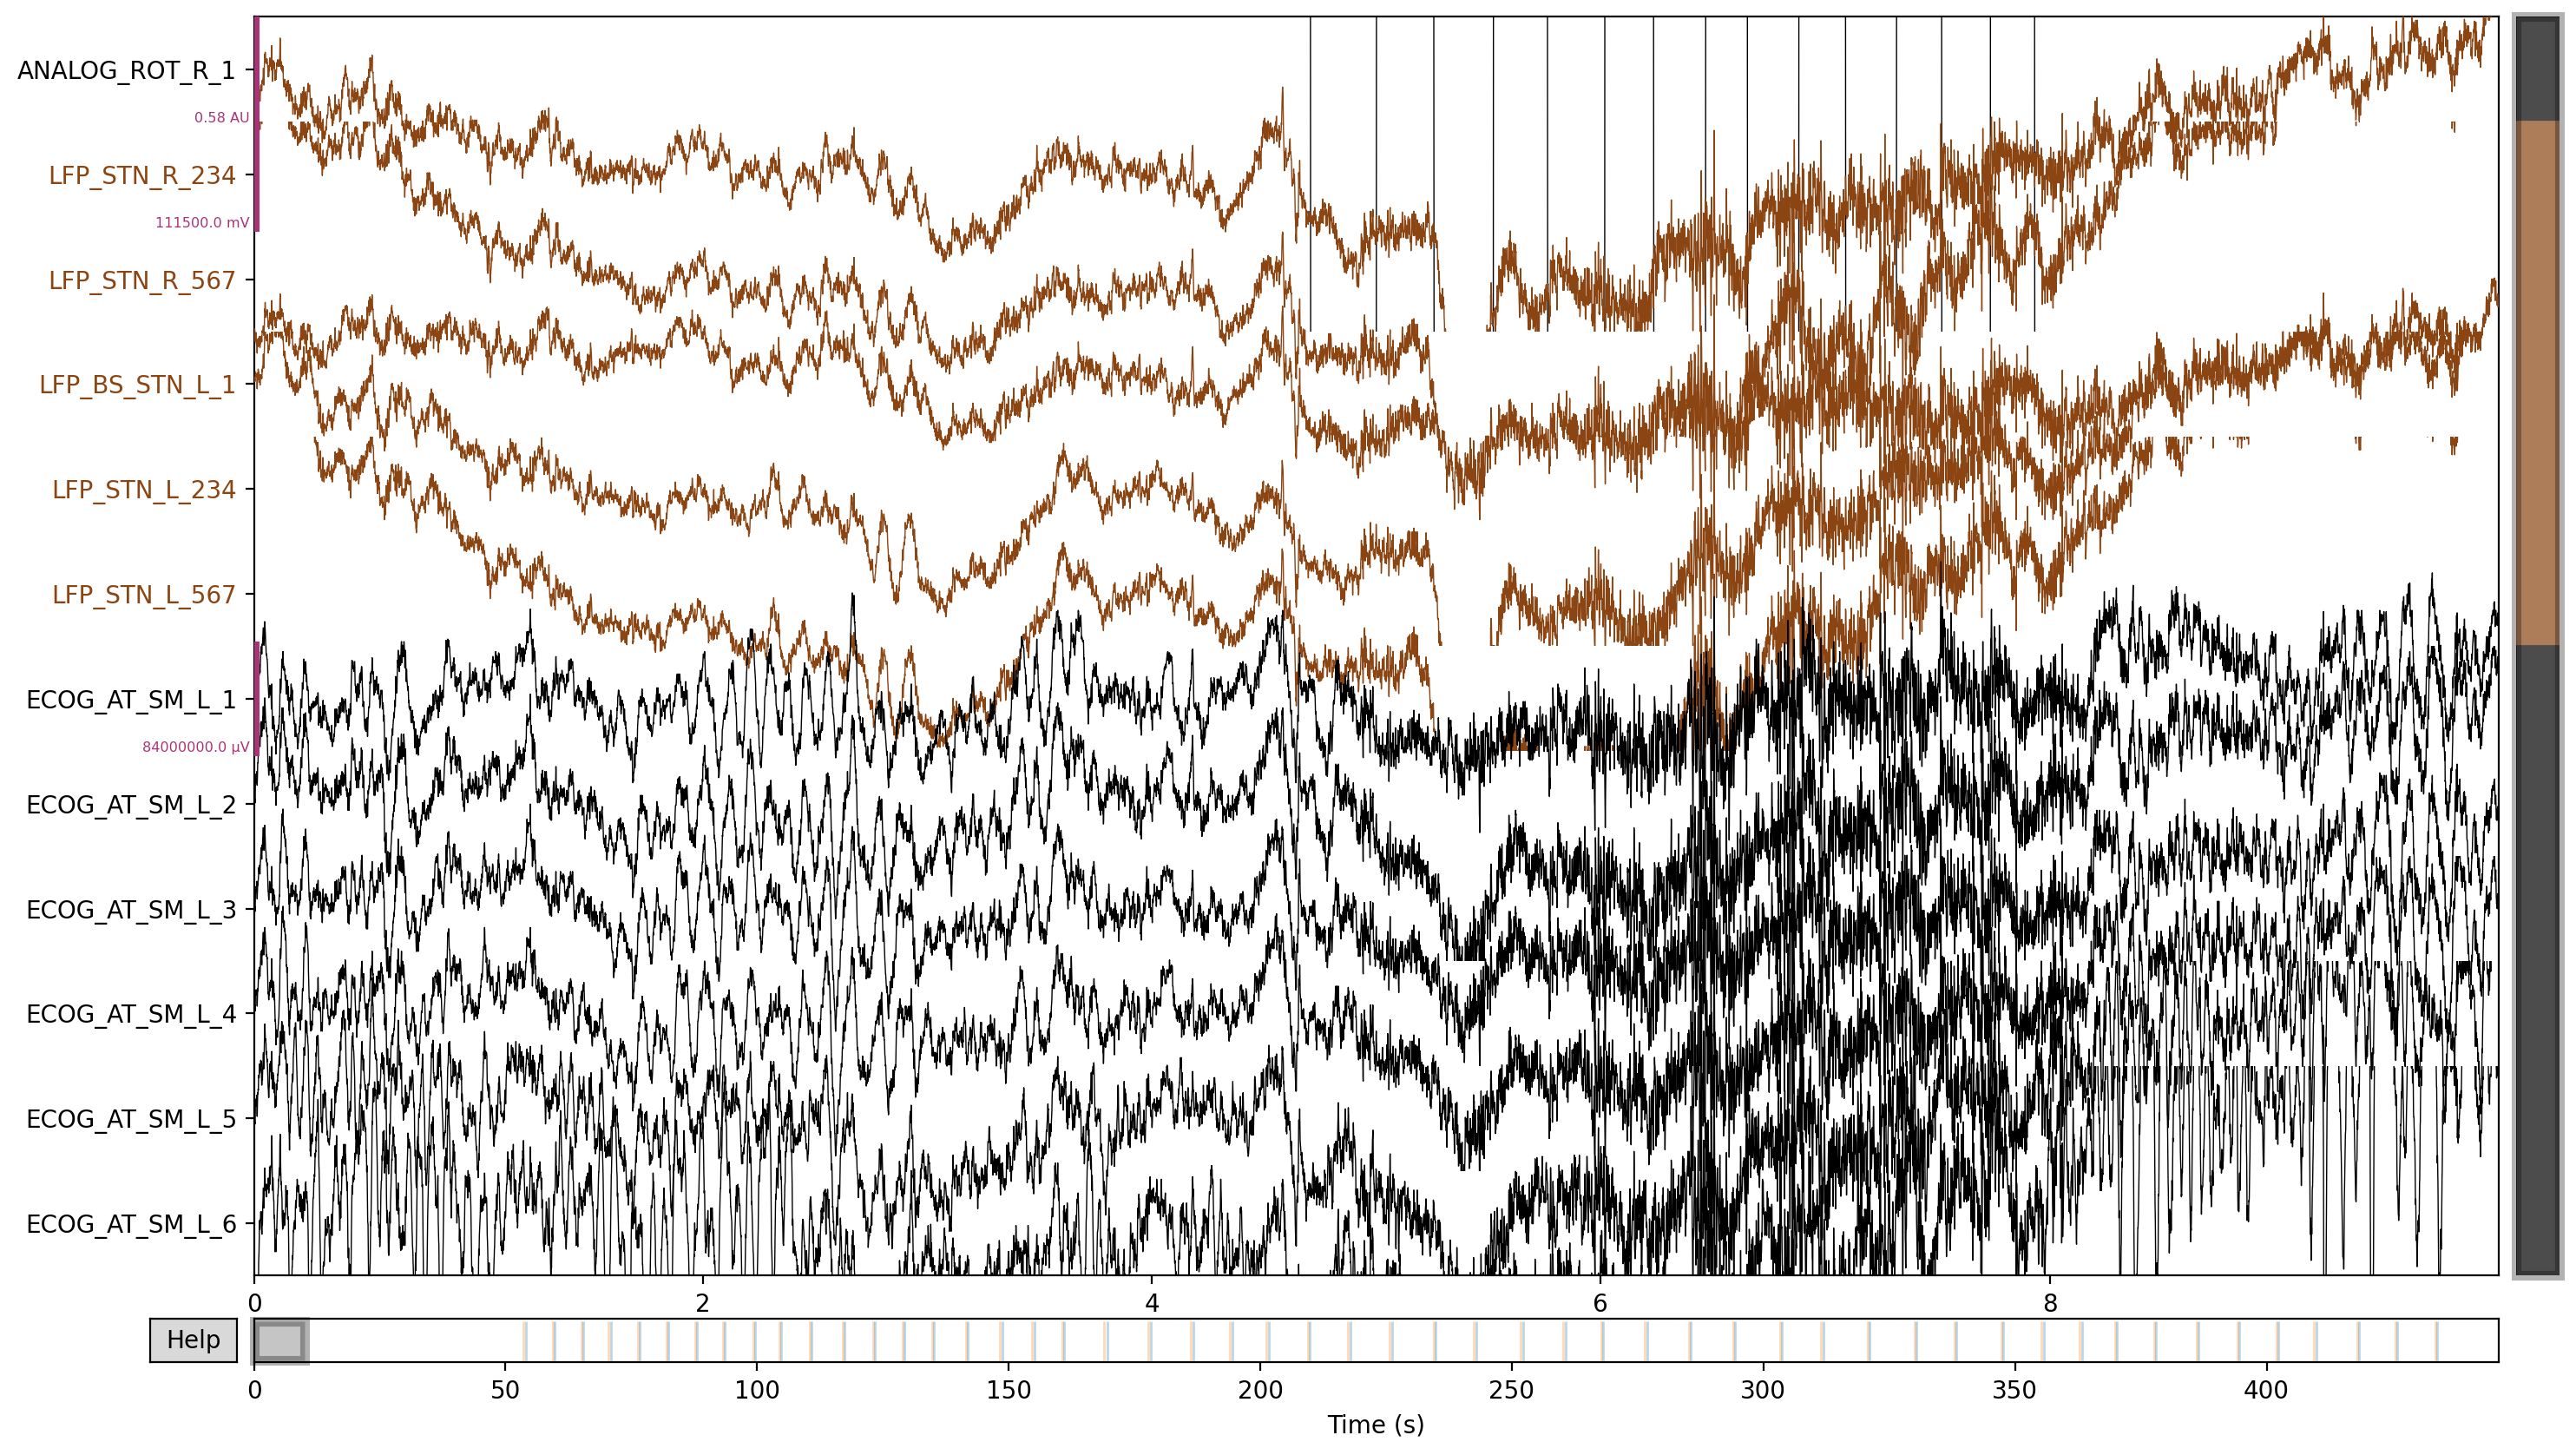

Channels marked as bad: none


In [6]:
%matplotlib qt
raw = mne_bids.read_raw_bids(bids_file, verbose=False)
raw.plot(scalings="auto", decim='auto')

### Get specifications of annotations

In [11]:
raw.annotations

<Annotations | 104 segments: Movement_End (52), Movement_Onset (52)>

### Now get array of events from annotations

In [13]:
event_id_dict = {"Movement_Onset": 1, "Movement_End": -1}
events, event_id = mne.events_from_annotations(raw, event_id_dict)
events

Used Annotations descriptions: ['Movement_End', 'Movement_Onset']


array([[ 73681,      0,      1],
       [ 74241,      0,     -1],
       [ 81648,      0,      1],
       [ 82148,      0,     -1],
       [ 89575,      0,      1],
       [ 90015,      0,     -1],
       [ 96983,      0,      1],
       [ 97462,      0,     -1],
       [104910,      0,      1],
       [105479,      0,     -1],
       [112707,      0,      1],
       [113277,      0,     -1],
       [120484,      0,      1],
       [120964,      0,     -1],
       [128281,      0,      1],
       [128731,      0,     -1],
       [136428,      0,      1],
       [136878,      0,     -1],
       [143645,      0,      1],
       [144055,      0,     -1],
       [151782,      0,      1],
       [152332,      0,     -1],
       [160869,      0,      1],
       [161348,      0,     -1],
       [169136,      0,      1],
       [169635,      0,     -1],
       [177203,      0,      1],
       [177822,      0,     -1],
       [185419,      0,      1],
       [185909,      0,     -1],
       [19